In [ ]:
###########################################################################
#                                                                         #
#         Project 5: Social Media Data Analysis, with BlueSky             #
#                                                                         #
#                      Author : Stephen Bouchardon                        #
#                                                                         #
###########################################################################

"""

Modules

"""

from atproto import *
from dotenv import load_dotenv
from os import getenv, makedirs
import pandas as pd
from textblob import TextBlob
import re
from collections import Counter
import matplotlib.pyplot as plt
import datetime as dt


In [23]:
###########################################################################
#                                                                         #
# Pre-loading                                                             #
# Functions : loginClient, get_query, fetchPosts, getInfoPost             #
#                                                                         #
###########################################################################

"""
Function: loginClient 

Logs in to the Bluesky social media using credentials from a .env file. 

Link documentation : https://docs.bsky.app/docs/get-started, https://docs.bsky.app/docs/starter-templates/bots

Parameters: None

Returns:
* client: Authenticated Bluesky session object
"""
def loginClient():

    load_dotenv() # load in the private credentials from .env file (email and password)

    bluesky_email = getenv("BLUESKY_EMAIL")
    bluesky_pwd = getenv("BLUESKY_PWD")

    client = Client() # login to the bluesky account via the api : atproto
    client.login(bluesky_email,bluesky_pwd)
    
    return client



"""
Function get_query: 

Use a regular expression in order to only accept short, alphabetical inputs.

Parameters: None

Returns:
* q : query used to search for the social media posts topic
"""
def get_query():
    pattern = re.compile(r'^[A-Za-z]{1,20}$')

    while True:
        q = input("Write down the topic you want to search: ")
        
        if pattern.fullmatch(q.strip()):
            return q
        else:
            print("Invalid input. Please use only 1 to 20 alphabetical characters.")



"""
Function: fetchPosts

Fetches targetted posts from Bluesky based on search parameters.

Link documentation : https://docs.bsky.app/docs/api/app-bsky-feed-search-posts

Parameters:
* client : Bluesky session object
* q: Search the string tag or hastag inside the text value of the post, format: "#{value}"
* sort: Ranking values by "latest" or "top"
* limit: Maximum number of posts retrieved, format: integer
* since: Starting date of search (inclusive), ISO format: "YYYY-MM-DDTHH:MM:SSZ"
* until: Ending date of search (exclusive), ISO format: "YYYY-MM-DDTHH:MM:SSZ"
* lang: Language of the search (e.g. "en", "fr")

Returns:
* df: Pandas DataFrame of post metadata (author, URI, text, timestamp)
"""
def fetchPosts(client, q="#football", sort="top",limit=100, since="2025-01-01T00:00:00Z", until="2025-06-01T00:00:00Z",lang="en"):
    # prepare a dictionnary to search the requested posts 
    search_params = {
        "q": q,  
        "sort": sort,
        "limit": limit, 
        "since" : since,
        "until" : until,
        "lang" : lang
    }

    # try to get the posts
    response = client.app.bsky.feed.search_posts(search_params)

    # from response, collect data in a list of dictionaries
    data = []

    for post in response.posts:
        post_record = post.record
        post_data = {
            "post_did": post.author.did,
            "post_uri": post.uri,
            "author": post.author.display_name,
            "handle": post.author.handle,
            "author_did": post.author.did,
            "text": post_record.text,
            "created_at": post_record.created_at
        }
        
        # add post values ( a dictionary ) to the list
        data.append(post_data)

    # convert list to DataFrame
    df = pd.DataFrame(data)

    return df


   
"""
Function: getInfoPost

Slice a DataFrame : accesses the i rows and j columns of a larger DataFrame.

Parameters:
* df: Pandas DataFrame
* i: Row index
* j: Column index

Returns:
* Subset of the DataFrame
"""
def getInfoPost(df,i,j):
    iMax, jMax = df.shape
    # if the i index is greater than the row size of the DataFrame, retrieve the last row of the DataFrame instead
    i = min(i, iMax - 1) 
    j = min(j, jMax - 1)
    return df.iloc[i, j]



""" Test """

# connect to the Client with the BlueSky API
client = loginClient()

# Make sure the format is correct for the text query
query = get_query()

# Get the actual time in ISO format for fetchPosts
untilTime = dt.datetime.now().replace(microsecond=0).isoformat() + 'Z'

df_posts = fetchPosts(client,q='#'+query,sort="top",limit=100,since="2025-01-01T00:00:00Z",until=untilTime,lang="en")

df_posts


Write down the topic you want to search:  history


,post_did,post_uri,author,handle,author_did,text,created_at
0,did:plc:vok3j6g7yrv63grj4to7byio,at://did:plc:vok3j6g7yrv63grj4to7byio/app.bsky...,Baseball by BSmile,bsmile.bsky.social,did:plc:vok3j6g7yrv63grj4to7byio,The powerful swing of young New York #Yankees ...,2025-06-25T14:36:46.068Z
1,did:plc:tl7hpw2ij6itli2or6khiusi,at://did:plc:tl7hpw2ij6itli2or6khiusi/app.bsky...,Dana Goldberg,dgcomedy.bsky.social,did:plc:tl7hpw2ij6itli2or6khiusi,Happy 10 years of Marriage Equality and the Ob...,2025-06-26T12:18:46.948Z
2,did:plc:cwyq3ofrxtuc7ixzo3v6bgyq,at://did:plc:cwyq3ofrxtuc7ixzo3v6bgyq/app.bsky...,Punk Rock History,punkrockhistory.bsky.social,did:plc:cwyq3ofrxtuc7ixzo3v6bgyq,"Released 45 years ago today\n\n""Love Will Tear...",2025-06-27T02:11:52.712Z
3,did:plc:cwyq3ofrxtuc7ixzo3v6bgyq,at://did:plc:cwyq3ofrxtuc7ixzo3v6bgyq/app.bsky...,Punk Rock History,punkrockhistory.bsky.social,did:plc:cwyq3ofrxtuc7ixzo3v6bgyq,"45 years ago today\n\n""Love Will Tear Us Apart...",2025-06-27T01:55:21.272Z
4,did:plc:tl7hpw2ij6itli2or6khiusi,at://did:plc:tl7hpw2ij6itli2or6khiusi/app.bsky...,Dana Goldberg,dgcomedy.bsky.social,did:plc:tl7hpw2ij6itli2or6khiusi,"Civil rights hero, activist, priest and gender...",2025-06-25T14:27:17.534Z
...,...,...,...,...,...,...,...
95,did:plc:np6moewljks2bmteagh6rixm,at://did:plc:np6moewljks2bmteagh6rixm/app.bsky...,RG Poulussen,rgpoulussen.bsky.social,did:plc:np6moewljks2bmteagh6rixm,#OTD in 1944. Lance Corporal Lodge from 278 Fi...,2025-06-26T05:01:08.556Z
96,did:plc:4lpq4ji2lpefepytmgntkr47,at://did:plc:4lpq4ji2lpefepytmgntkr47/app.bsky...,MK Alexander,smartreads.bsky.social,did:plc:4lpq4ji2lpefepytmgntkr47,"🕰 Murder, Mystery, History and Time Travel\n25...",2025-06-26T16:09:32.301Z
97,did:plc:tzh74kkpdt5anzz6yqnx3lzt,at://did:plc:tzh74kkpdt5anzz6yqnx3lzt/app.bsky...,Roman Piso,romanpiso.bsky.social,did:plc:tzh74kkpdt5anzz6yqnx3lzt,@paulinsc.bsky.social @antitheistkitty.bsky.so...,2025-06-24T01:04:25.762Z
98,did:plc:np6moewljks2bmteagh6rixm,at://did:plc:np6moewljks2bmteagh6rixm/app.bsky...,RG Poulussen,rgpoulussen.bsky.social,did:plc:np6moewljks2bmteagh6rixm,"#OTD in 1941, Black Mountains, Wales. Mule tea...",2025-06-26T05:00:07.977Z


,post_uri,polarity,category,likes
7,at://did:plc:cwyq3ofrxtuc7ixzo3v6bgyq/app.bsky...,0.800000,positive,50
57,at://did:plc:np6moewljks2bmteagh6rixm/app.bsky...,0.800000,positive,50
5,at://did:plc:eexrkxc76w3z3bxsdhonvdxn/app.bsky...,0.700000,positive,50
2,at://did:plc:cwyq3ofrxtuc7ixzo3v6bgyq/app.bsky...,0.650000,positive,50
1,at://did:plc:tl7hpw2ij6itli2or6khiusi/app.bsky...,0.611111,positive,50
...,...,...,...,...
78,at://did:plc:vok3j6g7yrv63grj4to7byio/app.bsky...,0.400000,positive,21
94,at://did:plc:6khwbcjlzf24liywdat6avgd/app.bsky...,0.133333,positive,21
81,at://did:plc:zagutraafprhv25onsfajxll/app.bsky...,0.125000,positive,21
79,at://did:plc:34ihfkdbo27flbjluvvdzjru/app.bsky...,0.033333,positive,20


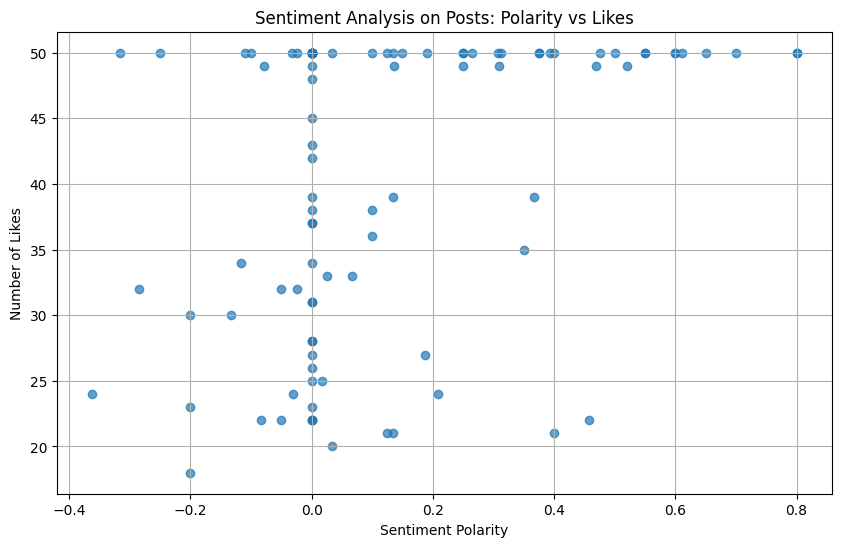

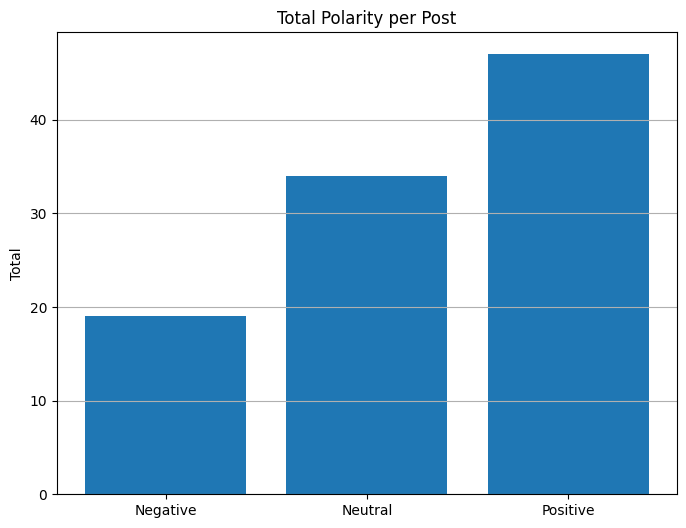

In [24]:
##########################################################################################################
#                                                                                                        #
# 1. Derive the sentiment of each post using Python modules (no need to create your Algorithm):          #
# Functions : get_polarity, categorize_polarity, get_likes, df_sentimentAnalysis, plot_sentimentAnalysis #
#                                                                                                        #
##########################################################################################################

"""
Function: get_polarity

From the library TextBlob and its sentiment analysis tools, 
the function calculate the polarity score within the range [-1.0, 1.0]. 
A better score is positive and tends to 1.0. If worse, to -1.0.

Link documentation : https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis

Parameters:
* text : string of characters

Returns:
* Float value between -1.0 and 1.0
"""
def get_polarity(text):
    return TextBlob(text).sentiment.polarity



"""
Function: categorize_polarity

Categorizes a post into sentiment type based on their polarity score.

Parameters:
* p: Float value, the polarity score found for a post with the function get_polarity

Returns:
* "positive", "negative" or "neutral"
"""
def categorize_polarity(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'



"""
Function: get_likes

With the URI of a post, the client object retrieves the like records and find the number of likes.

Link documentation : https://docs.bsky.app/docs/api/app-bsky-feed-get-likes

Parameters:
* client : Bluesky session object
* uri : Unique identifier of the post

Returns:
* Integer value, number of likes
"""
def get_likes(client, uri):
    response = client.app.bsky.feed.get_likes({"uri": uri})
    return len(response.likes)



"""
Function: df_sentimentAnalysis

Apply the functions get_polarity & get_likes for a dataset of posts.
Create a new DataFrame with the id of the post and its sentimental scores.
Finally, sort the DataFrame by polarity and number of likes.

Parameters:
* client: Bluesky session object
* df: Pandas DataFrame of posts

Returns:
* returnedDf: Sorted DataFrame of post URI, polarity, category and likes
"""

def df_sentimentAnalysis(client, df):
    # initialisation of the new dataframe
    df_postAnalysis = pd.DataFrame()
    df_postAnalysis['post_uri'] = df['post_uri']
    df_postAnalysis['polarity'] = df['text'].apply(get_polarity)
    df_postAnalysis['category'] = df_postAnalysis['polarity'].apply(categorize_polarity) # regroup per category the polarity in the dataframe
    df_postAnalysis['likes'] = df['post_uri'].apply(lambda uri: get_likes(client, uri))
    
    # sort by likes and sentiment polarity
    # the posts with the most likes and a more positive text will appear at the top of the DataFrame
    df_postAnalysisSorted = df_postAnalysis.sort_values(by=['likes', 'polarity'], ascending=False)

    return df_postAnalysisSorted     



"""
Function: plot_sentimentAnalysis

From the Sentimental Analysis on the data fetched with the API,
plot a representation the polarity vs the number of likes, 
and plot a bar chart reporting if the topic in general is seen as more postive, neutral of negative.

Parameters:
* df: Sentimental Analysis DataFrame

Returns: 
* fig1, fig2: PyPlot figures
"""
def plot_sentimentAnalysis(df):
    # Scatter points chart for sentiment polarity vs number of likes
    fig1, ax1 = plt.subplots(figsize=(10, 6))
    ax1.scatter(df['polarity'], df['likes'], alpha=0.7)
    ax1.set_title('Sentiment Analysis on Posts: Polarity vs Likes')
    ax1.set_xlabel('Sentiment Polarity')
    ax1.set_ylabel('Number of Likes')
    ax1.grid(True)

    # Count the total for each type of polarity
    sum_polarity = df['category'].value_counts()

    # Get counts in desired order
    category_polarity = [
        sum_polarity.get('negative', 0),
        sum_polarity.get('neutral', 0),
        sum_polarity.get('positive', 0)
    ]

    # Bar chart for categorizing polarity
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    ax2.bar(['Negative', 'Neutral', 'Positive'], category_polarity)
    ax2.set_title('Total Polarity per Post')
    ax2.set_ylabel('Total')
    ax2.grid(axis='y')

    return fig1, fig2



""" test """

df_posts_sentiment = df_sentimentAnalysis(client,df_posts)

fig1_sent,fig2_sent = plot_sentimentAnalysis(df_posts_sentiment)

df_posts_sentiment


/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3711822917.py:122: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  plt.tight_layout()
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3711822917.py:122: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.
  plt.tight_layout()
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3711822917.py:122: UserWarning: Glyph 917602 (\N{TAG LATIN SMALL LETTER B}) missing from current font.
  plt.tight_layout()
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3711822917.py:122: UserWarning: Glyph 917623 (\N{TAG LATIN SMALL LETTER W}) missing from current font.
  plt.tight_layout()
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3711822917.py:122: UserWarning: Glyph 917612 (\N{TAG LATIN SMALL LETTER L}) missing from current font.
  plt.tight_layout()
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/371

,user,nb_posts_by_user,tag,nb_tags
0,RG Poulussen,17,#otd,34
1,Punk Rock History,16,#ww2,24
2,Mark Evans Photography 🏴󠁧󠁢󠁷󠁬󠁳󠁿,7,#photography,18
3,Tank Archives,6,#punk,16
4,Hairy Neil,6,#punkrock,16
5,Baseball by BSmile,5,#punkrockhistory,14
6,Dana Goldberg,4,#punks,13
7,Louvain Rees ⚰️,3,#wales,10
8,Steve Teratsia 📷,2,#eastcoastkin,9
9,Jon Hawke,2,#art,8


/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  func(*args, **kwargs)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.
  func(*args, **kwargs)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 917602 (\N{TAG LATIN SMALL LETTER B}) missing from current font.
  func(*args, **kwargs)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 917623 (\N{TAG LATIN SMALL LETTER W}) missing from current font.
  func(*args, **kwargs)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 917612 (\N{TAG LATIN SMALL LETTER L}) missing from current font.
  func

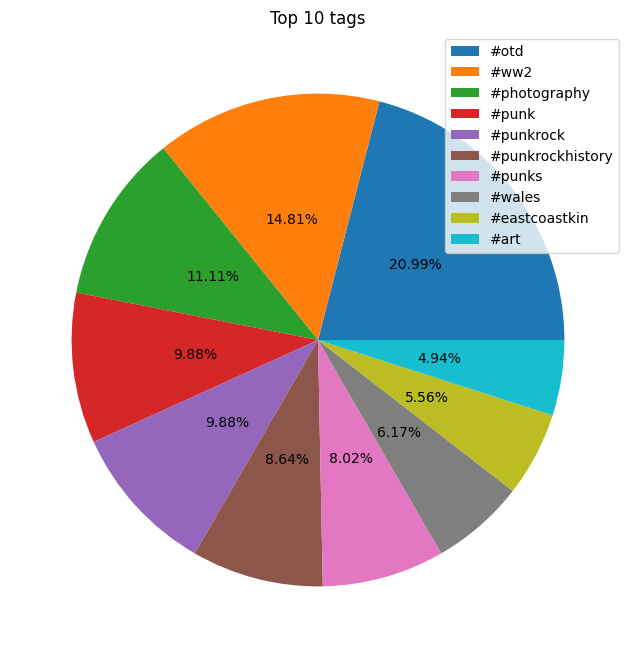

/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 917602 (\N{TAG LATIN SMALL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 917623 (\N{TAG LATIN SMALL LETTER W}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/stephenbouchardon/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.p

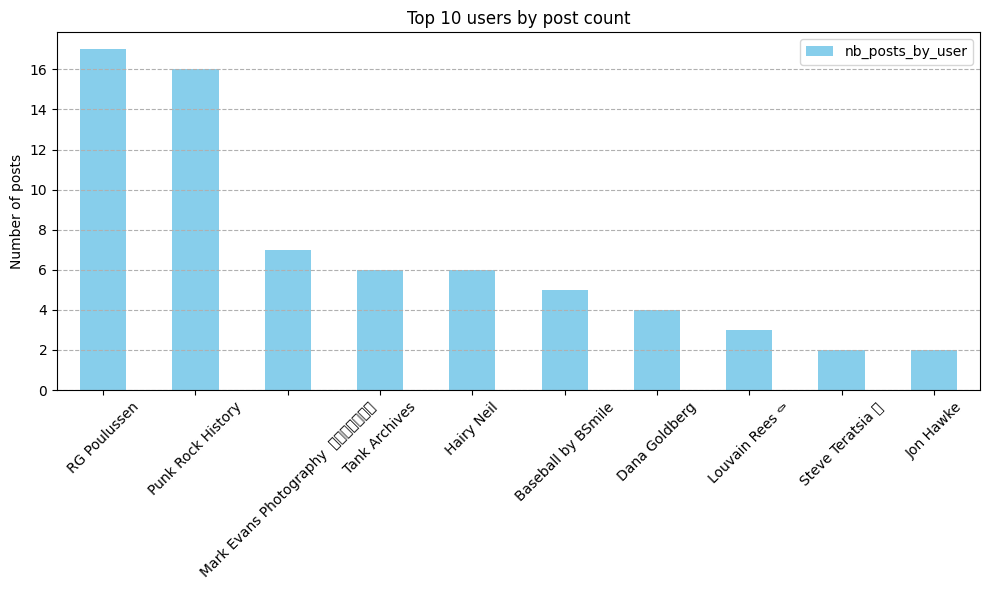

In [25]:
#############################################################################################
#                                                                                           #
# 2. Top 10 tags and users based on their number of posts in your data set:                 #
# Functions : get_top_tags, get_top_users_most_posts, df_top_tags_users, plot_top_tag_users #
#                                                                                           #
#############################################################################################

"""
Function: get_top_tags

Finds and ranks the n most frequently used tags.
We exclude the the top one, as it is the query tag and would not give any more new information on the posts.

Parameters:
* df: Pandas DataFrame of posts
* n: Number of tags to return 

Returns:
* top_tags: List of (tag_name, tag_count) tuples
"""
def get_top_tags(df,n=10):
    # find the top 10 tags from the data set, except #football:
    all_tags = df['text'].apply(lambda text: re.findall(r"#\w+", text.lower()))
    all_tags = [tag for sublist in all_tags for tag in sublist]
    
    # Count frequency
    tag_counts = Counter(all_tags)

    # remove the top count, it is the tag we used a as common subject for all the posts in the fetched data
    remv_tag, _ = tag_counts.most_common(1)[0]
    del tag_counts[remv_tag]

    # take only the n firsts
    top_tags = tag_counts.most_common(n)
    return top_tags


"""
Function: get_top_users_most_posts

Finds and ranks the n users most frequently posting.

Parameters:
* df: Pandas DataFrame of posts
* n: Number of users to return 

Returns:
* Pandas Series of top users
"""
def get_top_users_most_posts(df,n=10): 
    # find the top n users from the data set with the most posts
    return df['author'].value_counts().head(n)



"""
Function: df_top_tags_users

Creates a DataFrame for the top users and tags.

Parameters:
* df: Pandas DataFrame of posts
* n: Number of top users/tags

Returns:
* top_data: Combined DataFrame of top tags and top users
* df_top_users, df_top_tags : top_data DataFrame split up into two, one for users, one for tags

"""
def df_top_tags_users(df,n=10):

    # init top tags and users
    top_tags = get_top_tags(df)
    top_users = get_top_users_most_posts(df)
    
    # Create two separate DataFrames
    df_top_tags = pd.DataFrame(top_tags, columns=["tag", "nb_tags"])
    
    df_top_users = top_users.reset_index()
    df_top_users.columns = ["user", "nb_posts_by_user"]
    
    # Combine into one DataFrame (for display purposes)
    top_data = pd.concat([df_top_users, df_top_tags], axis=1)
        
    return top_data, df_top_users, df_top_tags



"""
Function: plot_top_tag_users

From the search on the top users and tags on the data fetched with the API,
plot a pie chart for the tags most found in the posts texts, 
and bar chart for users that have the most posts on the general topic.

Parameters:
* df_top_users: DataFrame with the top n users
* df_top_tags: DataFrame with the top n tags
* n : Number of top users/tags

Returns: 
* fig1, fig2: PyPlot figures
"""
def plot_top_tag_users(df_top_users, df_top_tags, n=10):
    # Pie chart for top tags
    tags = df_top_tags['tag']
    counts = df_top_tags['nb_tags']
    
    fig1, ax1 = plt.subplots(figsize=(8, 8))
    ax1.pie(counts, labels=None, autopct=lambda pct: f"{round(pct, 2)}%", pctdistance=0.5, labeldistance=1.3)
    ax1.set_title(f"Top {n} tags")
    ax1.legend(tags, loc='best')
    
    # Bar chart for top users
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    df_top_users.plot(kind='bar', x='user', y='nb_posts_by_user', color='skyblue', ax=ax2)
    ax2.set_title(f"Top {n} users by post count")
    ax2.set_ylabel("Number of posts")
    ax2.set_xlabel("")
    ax2.grid(True, axis='y', linestyle='--')
    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig1, fig2
    


""" test """

df_top, df_top_users, df_top_tags = df_top_tags_users(df_posts,10)

fig1_top,fig2_top = plot_top_tag_users(df_top_users, df_top_tags)

df_top


In [26]:
##################################################################################
#                                                                                #
# 3. Get the followers of a given social media user from your acquired data set: #
# Functions : get_top_user, getFollowers                                         # 
#                                                                                #  
##################################################################################

"""
Function: getFollowers

Fetches a limited list of followers for a given user.

Link documentation : https://docs.bsky.app/docs/api/app-bsky-graph-get-followers

Parameters:
* client: Bluesky session object
* user_did: Unique identifier for the user
* df: DataFrame containing post and author info
* limit : Maximum number of followers to fetch within the range [1,100]

Returns:
* followers: List of follower objects
"""
def getFollowers(client,user_did,df,limit=50):
    
    # Fetch followers
    response = client.app.bsky.graph.get_followers({'actor': user_did,'limit': limit})
    
    # Extract follower information
    followers = response.followers

    following_name = (df[df['author_did'] == user_did])['author'].iloc[0]
     
    # Display follower author names:
    print(f"Followers of {following_name} :")
        
    countFollowers=0
    for countFollowers,follower in enumerate(followers):
        print(f"{countFollowers} : {follower.display_name or follower.handle}") 
        # some users do not have displayed name. In that case, print their handle.
    print(f"Total count of followers = {countFollowers+1}")
    
    return followers



"""
Function: get_top_user

Retrieves from the Top users DataFrame, the user that has the most posts in our intial dataset.

Parameters:
* df_posts: DataFrame containing posts information
* df_top: DataFrame containing the top users information

Returns:
* Unique identifier of the top user
"""
def get_top_user(df_posts, df_top):
    top_user_name = df_top['user'].iloc[0] # find the top users name in the top users dataframe, make sure it is valid
    return df_posts.loc[df_posts['author'] == top_user_name, 'author_did'].iloc[0] 



""" test """

top_user_did = get_top_user(df_posts, df_top)
top_user_followers = getFollowers(client,top_user_did,df_posts,100)


Followers of RG Poulussen :
0 : Jean Prince
1 : thehillstreet.bsky.social
2 : Will Webster
3 : John MacPherson
4 : Gareth Edwards
5 : Steffan @ FlankMarch
6 : drmamaq.bsky.social
7 : Ange greco
8 : sfgirluk
9 : yellerbelly7.bsky.social
10 : fluffyducksays.bsky.social
11 : Herr Doktor Evil
12 : Tom
13 : Marta Pereira
14 : Patient Advocacy 202-224-3121
15 : Peter Stagnetto
16 : Ayman Aljedi
17 : Cal
18 : Lappietova
19 : Adam, a solicitor advocate
20 : Jonathan Tan
21 : Billy Morrison
22 : Petrarca
23 : douglasrijksen.bsky.social
24 : aidansquiffy.bsky.social
25 : Destinations Journey
26 : Andy J
27 : Pervis Purves
28 : Michael Webster
29 : nadiawithaboringj.bsky.social
30 : matthewrushuk.bsky.social
31 : Fathom Deep
32 : Peter
33 : Rachel
34 : The Masterblaster
35 : kishon
36 : Paul Cowling
37 : James Curtis
38 : Henry Gordon Jagoff
39 : Elthampug 🇬🇧🇺🇦
40 : Anasjamal44
41 : KSlatteryResist
42 : davisshane.bsky.social
43 : Ronald Hemenway
44 : Andy Taylor
45 : Johns Detecting Adventures U

In [27]:
#########################################################################################################
#                                                                                                       #
# 4. Given a social media user, obtain the posts and profiles of all followers of the user and show it: #
# Functions : get_profile, get_recent_posts, df_followers, df_followers_post                            #
#                                                                                                       #  
#########################################################################################################

"""
Function get_profile: 

Send API request to fetch detailed profile view of an actor and its metadata.

Parameters:
* client: Bluesky session object
* user_did: Unique identifier for the user

Returns:
* Detailed profile view of an actor
"""
# function to get profile of a user
def get_profile(client, user_did):
    return client.app.bsky.actor.get_profile({'actor': user_did})



"""
Function get_recent_posts: 

Fetches the most recent posts made by a user using their unique DID.

Parameters:
* client: Bluesky session object
* user_did: Unique identifier for the user
* limit: Max number of posts to retrieve per follower

Returns:
* List of post objects from the user’s feed.
"""
# function to get recent posts of a user, max limit is 5
def get_recent_posts(client, user_did, limit=5):
    response = client.app.bsky.feed.get_author_feed({'actor': user_did, 'limit': limit})
    return response.feed



"""
Function df_followers: 

Store detailed profile information of followers in a DataFrame. 
For each follower, collects metadata in a list, then, converted in a DataFrame.

Parameters:
* client: Bluesky session object
* followers: List of post objects from the user’s feed.
* limit: Max number of posts to retrieve per follower

Returns:
* df_followers: DataFrame containing profile metadata for each follower.
"""
def df_followers(client, followers, limit=5):

    # add a list to store follower information, then transform into df
    follower_data = []
    
    for follower in followers:
        follower_did = follower.did
        profile = get_profile(client,follower_did)
        posts = get_recent_posts(client,follower_did, limit=5)
        
        follower_info = {
            'display_name': profile.display_name,
            'handle': profile.handle,
            'avatar_url': profile.avatar,
            'description': profile.description,
            'followers_count': profile.followers_count,
            'following_count': profile.follows_count,
            'posts_count': profile.posts_count,
        }
        
        follower_data.append(follower_info)
    
    # create a DataFrame
    df_followers = pd.DataFrame(follower_data)

    return df_followers



"""
Function df_followers_post: 

Fetch recent post DIDs for each follower and return a DataFrame containing display name,
handle, DID, and a list of their post DIDs.

Parameters: 
* client: Bluesky session object
* followers: List of follower objects (each with a 'did' attribute)
* limit: Max number of posts to retrieve per follower (default: 5)

Returns:
* pandas.DataFrame with columns: display_name, handle, did, post_dids
"""
def df_followers_post(client, followers, limit=5):
    data = []

    for follower in followers:
        follower_did = follower.did
        profile = get_profile(client, follower_did)
        posts = get_recent_posts(client, follower_did, limit=limit)

        post_uris = [
            post.post.uri
            for post in posts
            if hasattr(post, 'post') and hasattr(post.post, 'uri')
        ]

        data.append({
            'display_name': profile.display_name,
            'handle': profile.handle,
            'author_did': follower_did,
            'post_dids': post_uris if len(post_uris) > 0 else None
        })

    df = pd.DataFrame(data)
    return df



    
""" Test """

df_top_user_followers = df_followers(client, top_user_followers)

df_top_user_followers


,display_name,handle,avatar_url,description,followers_count,following_count,posts_count
0,Jean Prince,jpgrackle.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Guardian reader | #birds | #environment | Deut...,406,521,72
1,,thehillstreet.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,https://uk.bookshop.org,661,1811,26
2,Will Webster,willwritesword.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"Lover of history, geography, bad jokes and lis...",153,920,17
3,John MacPherson,johnmacpherson.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Mostly a photographer: https://www.john-macphe...,782,426,1929
4,Gareth Edwards,garethe68.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"A Fo Ben, Bid Het\n\nPsychedelic dragoon at:\n...",215,181,1407
...,...,...,...,...,...,...,...
89,Canadian Virtual Military Museum (formerly on ...,canvmilitarymuseum.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Educational A source for factual information a...,58,169,117
90,Granny T,granny-t.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,Are we in a Constitutional Crisis YET?!!!\n\nS...,7570,11970,449
91,Bart,cautespin.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,None,13,72,0
92,Greg Shaw,zenmousegreg.bsky.social,https://cdn.bsky.app/img/avatar/plain/did:plc:...,"(he/him) Physicist, software engineer, atheist...",213,200,177


In [28]:
""" Follow up test """

df_top_user_followers_post = df_followers_post(client, top_user_followers)

df_top_user_followers_post


,display_name,handle,author_did,post_dids
0,Jean Prince,jpgrackle.bsky.social,did:plc:oa3kqefdecmxq35gofflhjlw,[at://did:plc:oa3kqefdecmxq35gofflhjlw/app.bsk...
1,,thehillstreet.bsky.social,did:plc:im2h565oq2tvsi2ev3eysw3y,[at://did:plc:np6moewljks2bmteagh6rixm/app.bsk...
2,Will Webster,willwritesword.bsky.social,did:plc:k24km4qgxpuqaapsdelqhzyl,[at://did:plc:k24km4qgxpuqaapsdelqhzyl/app.bsk...
3,John MacPherson,johnmacpherson.bsky.social,did:plc:6cn6xdoywstuszecuyqflnd5,[at://did:plc:hyyqshfmzarjhybykciopfw6/app.bsk...
4,Gareth Edwards,garethe68.bsky.social,did:plc:tpk23xm5rm7bu72jhfft2tzo,[at://did:plc:tpk23xm5rm7bu72jhfft2tzo/app.bsk...
...,...,...,...,...
89,Canadian Virtual Military Museum (formerly on ...,canvmilitarymuseum.bsky.social,did:plc:poirpdjhdlzomi2ik723f32m,[at://did:plc:poirpdjhdlzomi2ik723f32m/app.bsk...
90,Granny T,granny-t.bsky.social,did:plc:2j3uufxhvdi3mxjz6ftsayxn,[at://did:plc:4llrhdclvdlmmynkwsmg5tdc/app.bsk...
91,Bart,cautespin.bsky.social,did:plc:l2s2qtrgim74jy4nmv4ywslg,None
92,Greg Shaw,zenmousegreg.bsky.social,did:plc:d3ybdeg4jvdi3gtapbf2zwlv,[at://did:plc:d3ybdeg4jvdi3gtapbf2zwlv/app.bsk...


In [30]:
#########################################################################################################
#                                                                                                       #
# Exporting data                                                                                        #
# Functions : export_data                                                                               #
#                                                                                                       #  
#########################################################################################################

"""
Function export_data: 

Create a directory named after the query used for the data analysis.
Also, two sub folders are made to store respectively the dataframes and the charts.

Parameters: None

Returns: None
"""
def export_data():

    try:
        # Create a directory if it does not exist yet to export the data
        dir_name = f"res_{query}_{untilTime}"
        makedirs(dir_name, exist_ok=True)
        makedirs(dir_name+"/csv", exist_ok=True)
        makedirs(dir_name+"/png", exist_ok=True)
    
        # DataFrames -> .csv files
        df_posts.to_csv(f"{dir_name}/csv/output_posts.csv", index=False)
        df_posts_sentiment.to_csv(f"{dir_name}/csv/output_posts_sentiment.csv", index=False)
        df_top.to_csv(f"{dir_name}/csv/output_top_tags_users.csv", index=False)
        df_top_user_followers.to_csv(f"{dir_name}/csv/output_top_user_followers.csv", index=False)
        df_top_user_followers_post.to_csv(f"{dir_name}/csv/output_top_user_followers_posts.csv", index=False)
    
        fig1_sent.savefig(f"{dir_name}/png/fig1_sent.png", bbox_inches='tight')
        fig2_sent.savefig(f"{dir_name}/png/fig2_sent.png", bbox_inches='tight')
        fig1_top.savefig(f"{dir_name}/png/fig1_top.png", bbox_inches='tight')
        fig2_top.savefig(f"{dir_name}/png/fig2_top.png", bbox_inches='tight')
        print("Succesful files exportation")
    except Exception as e:
        print("Error: ", e)



""" Test """

export_data()


Succesful files exportation


/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3639818085.py:37: UserWarning: Glyph 127988 (\N{WAVING BLACK FLAG}) missing from current font.
  fig2_top.savefig(f"{dir_name}/png/fig2_top.png", bbox_inches='tight')
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3639818085.py:37: UserWarning: Glyph 917607 (\N{TAG LATIN SMALL LETTER G}) missing from current font.
  fig2_top.savefig(f"{dir_name}/png/fig2_top.png", bbox_inches='tight')
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3639818085.py:37: UserWarning: Glyph 917602 (\N{TAG LATIN SMALL LETTER B}) missing from current font.
  fig2_top.savefig(f"{dir_name}/png/fig2_top.png", bbox_inches='tight')
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipykernel_2664/3639818085.py:37: UserWarning: Glyph 917623 (\N{TAG LATIN SMALL LETTER W}) missing from current font.
  fig2_top.savefig(f"{dir_name}/png/fig2_top.png", bbox_inches='tight')
/var/folders/ff/chz2bl110xngmkn2flthr47m0000gn/T/ipyker